In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [191]:
df = pd.read_csv('../data_given/winequality.csv')

In [192]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,TARGET
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  TARGET                1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [194]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,TARGET
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [195]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
TARGET                  0
dtype: int64

<AxesSubplot:>

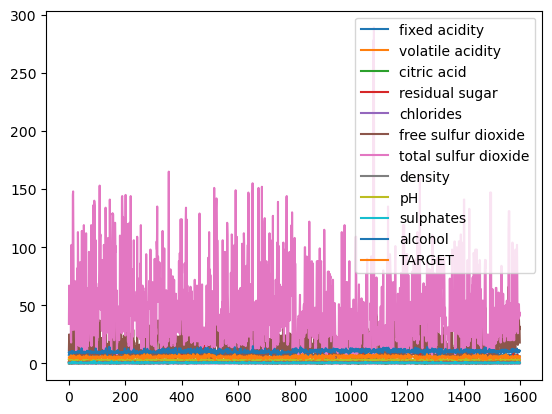

In [196]:
df.plot()

<AxesSubplot:xlabel='fixed acidity', ylabel='TARGET'>

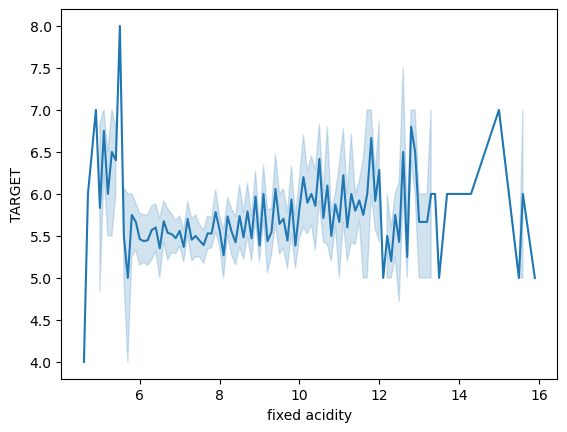

In [197]:
sns.lineplot(data=df,x= "fixed acidity", y= "TARGET")

# Optimizing Grid Search CV 

In [198]:
train_data = pd.read_csv("../data/processed/train_winequality.csv")
test_data = pd.read_csv("../data/processed/test_winequality.csv")

In [199]:
train_data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,TARGET
0,8.7,0.690,0.31,3.0,0.086,23.0,81.0,1.00020,3.48,0.74,11.6,6
1,6.1,0.210,0.40,1.4,0.066,40.5,165.0,0.99120,3.25,0.59,11.9,6
2,10.9,0.390,0.47,1.8,0.118,6.0,14.0,0.99820,3.30,0.75,9.8,6
3,8.8,0.685,0.26,1.6,0.088,16.0,23.0,0.99694,3.32,0.47,9.4,5
4,8.4,1.035,0.15,6.0,0.073,11.0,54.0,0.99900,3.37,0.49,9.9,5


In [200]:
train_x = train_data.drop("TARGET", axis = 1)
test_x = test_data.drop('TARGET', axis = 1)

In [201]:
train_y = train_data["TARGET"]
test_y = test_data["TARGET"]

In [202]:
def standard_scaler(x_train, x_test):
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)
    
    return x_train_scaled, x_test_scaled

In [203]:
x_train_scaled, x_test_scaled = standard_scaler(train_x, test_x)

In [204]:
def train_model(models, x_train_scaled, x_test_scaled, y_train, y_test):
    model_res = []
    model_names = []
    model_detail = {}
    for model in range(len(models)):
        regressor = models[model]
        regressor.fit(x_train_scaled, y_train)
        y_pred = regressor.predict(x_test_scaled)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        model_res.append(r2)
        model_names.append(type(regressor).__name__)
        model_detail[regressor] = r2
        print(f"{'-'*30} {type(regressor).__name__} {'-'*30}")
        print(f'Mean Absolute Error : {mae}')
        print(f'R2 Score : {r2}')
        print('*'*80)
        
    result_df = pd.DataFrame(list(zip(model_names, model_res)), columns = ['Model', 'R2_Score'])
    best_model = max(zip(model_detail.values(), model_detail.keys()))[1]
    return best_model    

In [205]:
import yaml

In [206]:
def read_models(models_path):
    with open(models_path) as yaml_file:
        model_config = yaml.safe_load(yaml_file)
    return model_config

In [207]:
file = "../testfiles/models_params.yaml"
models = read_models(file)

In [208]:
def model_extractor(models_config):
    model_list = []
    if models_config["models"]["linear_regression"] == True:
        model_list.append(LinearRegression())

    if models_config["models"]["ridge"] == True:
        model_list.append(Ridge())

    if models_config["models"]["lasso"] == True:
        model_list.append(Lasso())

    if models_config["models"]["elasticnet"] == True:
        model_list.append(ElasticNet())

    if models_config["models"]["svr"] == True:
        model_list.append(SVR())

    if models_config["models"]["xgb"] == True:
        model_list.append(XGBRegressor())

    if models_config["models"]["random_forest"] == True:
        model_list.append(RandomForestRegressor())

    if models_config["models"]["knn_reg"] == True:
        model_list.append(KNeighborsRegressor())

    if models_config["models"]["decision_tree_reg"] == True:
        model_list.append(DecisionTreeRegressor())

    else: 
        return 'No Model found!'

    return model_list



In [209]:
linear_models = model_extractor(models)

In [210]:
linear_models

[LinearRegression(),
 Ridge(),
 Lasso(),
 ElasticNet(),
 SVR(),
 XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...),
 RandomForestRegressor(),
 KNeighborsRegressor(),
 DecisionTreeRegressor()]

In [211]:
# linear_models = [LinearRegression(), Ridge(), Lasso(), ElasticNet(), SVR(), XGBRegressor(), RandomForestRegressor(), KNeighborsRegressor()]

In [212]:
best_model = train_model(linear_models, x_train_scaled, x_test_scaled, train_y, test_y)


------------------------------ LinearRegression ------------------------------
Mean Absolute Error : 0.5035304415524375
R2 Score : 0.403180341279622
********************************************************************************
------------------------------ Ridge ------------------------------
Mean Absolute Error : 0.5035596204290793
R2 Score : 0.4031606598177524
********************************************************************************
------------------------------ Lasso ------------------------------
Mean Absolute Error : 0.6852839132134478
R2 Score : -0.005591701339940913
********************************************************************************
------------------------------ ElasticNet ------------------------------
Mean Absolute Error : 0.6852839132134478
R2 Score : -0.005591701339940913
********************************************************************************
------------------------------ SVR ------------------------------
Mean Absolute Error : 0.453528476

In [213]:
models["params"].keys()

dict_keys(['LinearRegression', 'Ridge', 'Lasso', 'SVR', 'XGBoostRegressor', 'RandomForestRegressor', 'KNeighborsRegressor', 'DecisionTreeRegressor'])

In [231]:
best_model_name = type(best_model).__name__

In [246]:
def RandomSearch_best_model(model, model_config , x_train, y_train, x_test, y_test, result_yaml_path, old_model_path):
    hptune_result = {}
    model_name = type(model).__name__
    param_grid = model_config['params'][model_name]

    rcv = RandomizedSearchCV(estimator = model, param_distributions = param_grid,n_iter = 100, cv = 5, verbose = 2)
    rcv.fit(x_train, y_train)

    best_params = rcv.best_params_
    
    best_estimator = rcv.best_estimator_
    y_pred = best_estimator.predict(x_test)
    mae = mean_absolute_error(test_y, y_pred)
    r2 = r2_score(test_y, y_pred)
    rmse = np.sqrt(mean_squared_error(test_y, y_pred))

    hptune_result["best_params"] = best_params
    hptune_result["metrics"] = {"rmse" : rmse, "mae": mae, "r2" : r2}
    hptune_result["model_name"] = model_name
    hptune_result["experiment_name"] = model_name

    with open(result_yaml_path) as res:
        res_dict = yaml.safe_load(res)
    
    if res_dict["metrics"]["r2"] >= r2:
        print('Best Model already present!')
        with open(old_model_path, "rb") as f:
            loaded_model = joblib.load(f)
        return loaded_model

    else:
        print('New Best Model Found!')
        with open(result_yaml_path, 'w+') as res:
            yaml.dump(hptune_result, res)
        return best_estimator

    

In [247]:
rcv_res_yaml = '../testfiles/hptune_result.yaml'

In [248]:
with open(rcv_res_yaml) as res:
    res_dict = yaml.safe_load(res)

In [249]:
res_dict["metrics"]["r2"]

0.5036876942339937

In [250]:
old_model = '../testfiles/model.joblib'

In [251]:
RandomSearch_best_model(model = best_model, model_config=models, x_train= x_train_scaled, \
 y_train= train_y, x_test= x_test_scaled, y_test= train_y,\
 result_yaml_path= rcv_res_yaml , old_model_path=old_model)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END max_depth=6, min_samples_leaf=2, min_

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.1, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=9, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [238]:
old_model = '../testfiles/model.joblib'
with open(old_model, "rb") as f:
    loaded = joblib.load(f)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.1, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=9, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [224]:
sam_dict = {'best_params': {'n_estimators': 150,
  'min_samples_split': 2,
  'min_samples_leaf': 2,
  'max_depth': 20},
 'metrics': {'rmse': 0.5695111938302897,
  'mae': 0.44515603620727917,
  'r2': 0.5036876942339937},
 'model_name': 'RandomForestRegressor',
 'experiment_name': 'RandomForestRegressor'}

In [252]:
best_params = sam_dict["best_params"]

In [256]:
for i in best_params:
    print(f"{i} : {best_params[i]}") 
    print(type(i))

n_estimators : 150
<class 'str'>
min_samples_split : 2
<class 'str'>
min_samples_leaf : 2
<class 'str'>
max_depth : 20
<class 'str'>


In [225]:
with open(rcv_res_yaml , 'w+') as res:
    yaml.dump(sam_dict, res)

In [95]:
import joblib

In [96]:
file_path = '../testfiles/model.joblib'

In [97]:
with open(file_path, "wb") as file:
    joblib.dump(best_xgb_estimator, file)

In [98]:
model = joblib.load(file_path)

In [99]:
model.

SyntaxError: invalid syntax (1068564517.py, line 1)

In [ ]:
print(model.score)

<bound method RegressorMixin.score of XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.1, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=9, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)>


In [ ]:
type(LinearRegression())

sklearn.linear_model._base.LinearRegression

In [ ]:
sklearn.linear_model._base.LinearRegression

NameError: name 'sklearn' is not defined

AttributeError: 'tuple' object has no attribute '__annotations__'